###  NAME     : SAIFULLAH RAJPUT
###  ROLL_NO  : 379693
###  DATA ANALYZATION ON NETFLIX'S DATA

In [112]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [113]:
dataset = pd.read_csv("netflix_titles.csv")

In [114]:
dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [115]:
dataset.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [116]:
dataset.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [117]:
dataset.shape

(8807, 12)

In [118]:
dataset.fillna({
    'director': 'Unknown',
    'cast': 'Unknown',
    'country': 'Unknown',
    'date_added': 'Unknown',
    'rating': 'Not Rated',
    'duration': 'Unknown'
}, inplace=True)


In [119]:
dataset.columns = dataset.columns.str.strip()

In [120]:
dataset.isnull().sum()


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [121]:
dataset['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

### VISUALIZING WITH THE HELP OF BAR CHART FOR UNDERSTANDING

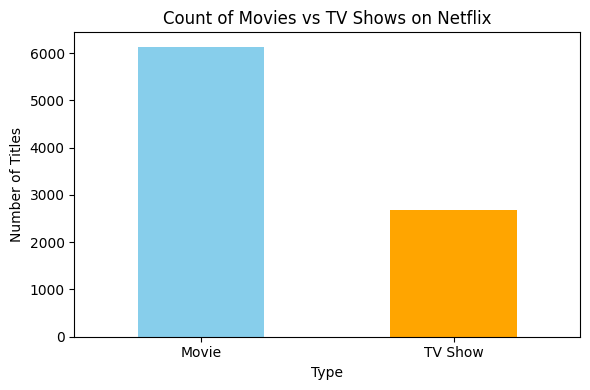

In [92]:
type_counts = dataset['type'].value_counts()

plt.figure(figsize=(6,4))
type_counts.plot(kind='bar', color=['skyblue', 'orange'])

plt.title('Count of Movies vs TV Shows on Netflix')
plt.xlabel('Type')
plt.ylabel('Number of Titles')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [44]:
dataset['country'] = dataset['country'].str.split(', ')
exploded = dataset.explode('country')

In [47]:
top_countries = exploded['country'].value_counts()
top_countries.head(10)


country
United States     3689
India             1046
Unknown            831
United Kingdom     804
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Name: count, dtype: int64

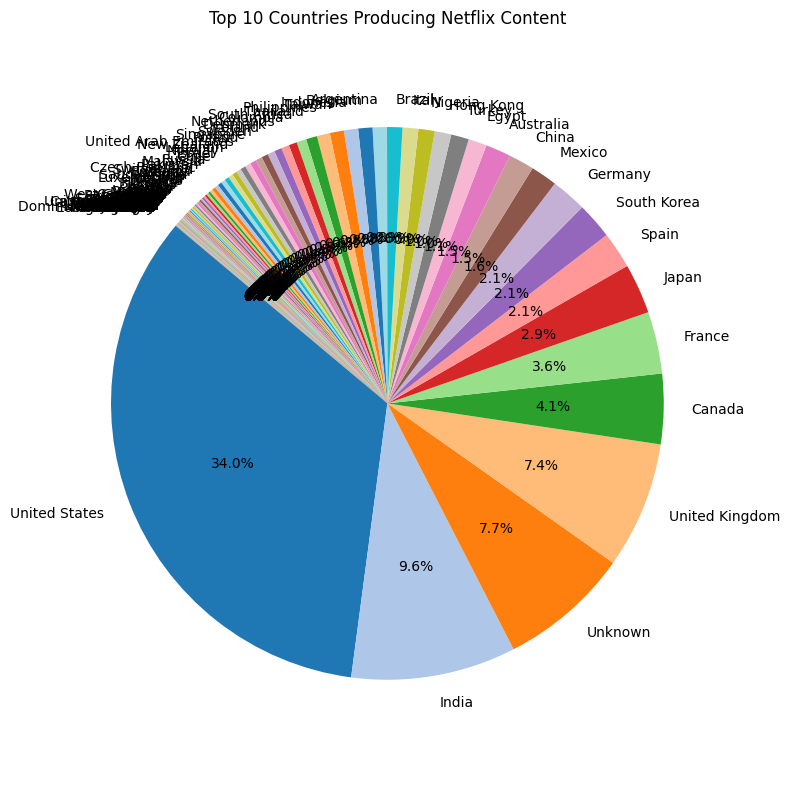

In [53]:
plt.figure(figsize=(8, 8))
plt.pie(
    top_countries, 
    labels=top_countries.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.tab20.colors  #  Good color palette
)

plt.title('Top 10 Countries Producing Netflix Content')
plt.axis('equal')  # To  ensure that  pie is drawn as a circle
plt.tight_layout()
plt.show()

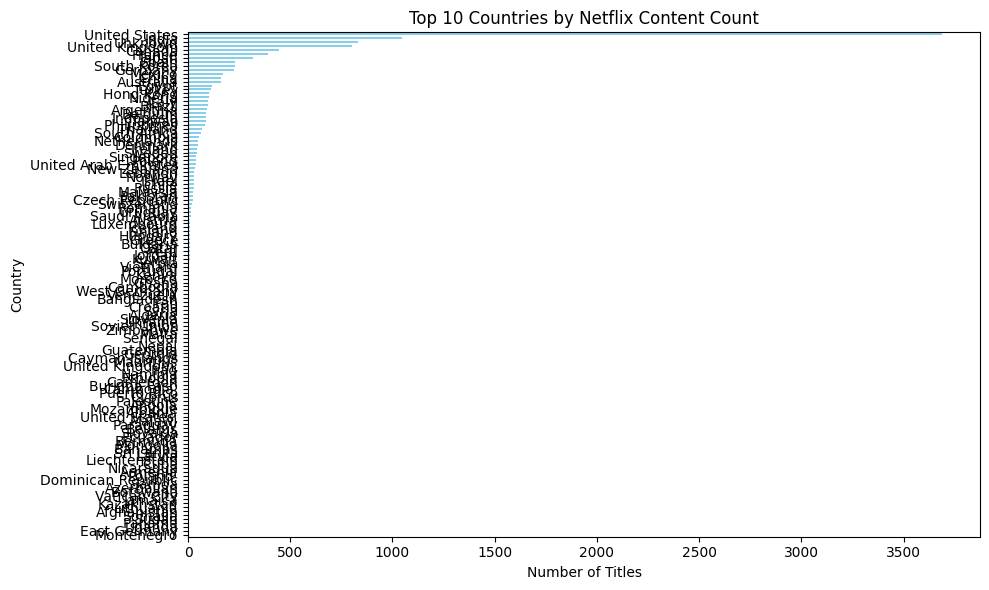

In [95]:
plt.figure(figsize=(10,6))
top_countries.plot(kind='barh', color='skyblue')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.title('Top 10 Countries by Netflix Content Count')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

In [125]:
dataset['country'] = dataset['country'].fillna('Unknown')
dataset['listed_in'] = dataset['listed_in'].fillna('Unknown')

In [127]:

# Split multiple countries and genres into lists
dataset['country_list'] = dataset['country'].str.split(', ')
dataset['genre_list'] = dataset['listed_in'].str.split(', ')


In [54]:
dataset.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Fill missing genres if any
dataset['listed_in'] = dataset['listed_in'].fillna('Unknown')


dataset['genre_list'] = dataset['listed_in'].str.split(', ')
genres_exploded = dataset.explode('genre_list')

In [56]:
genre_counts = genres_exploded['genre_list'].value_counts()

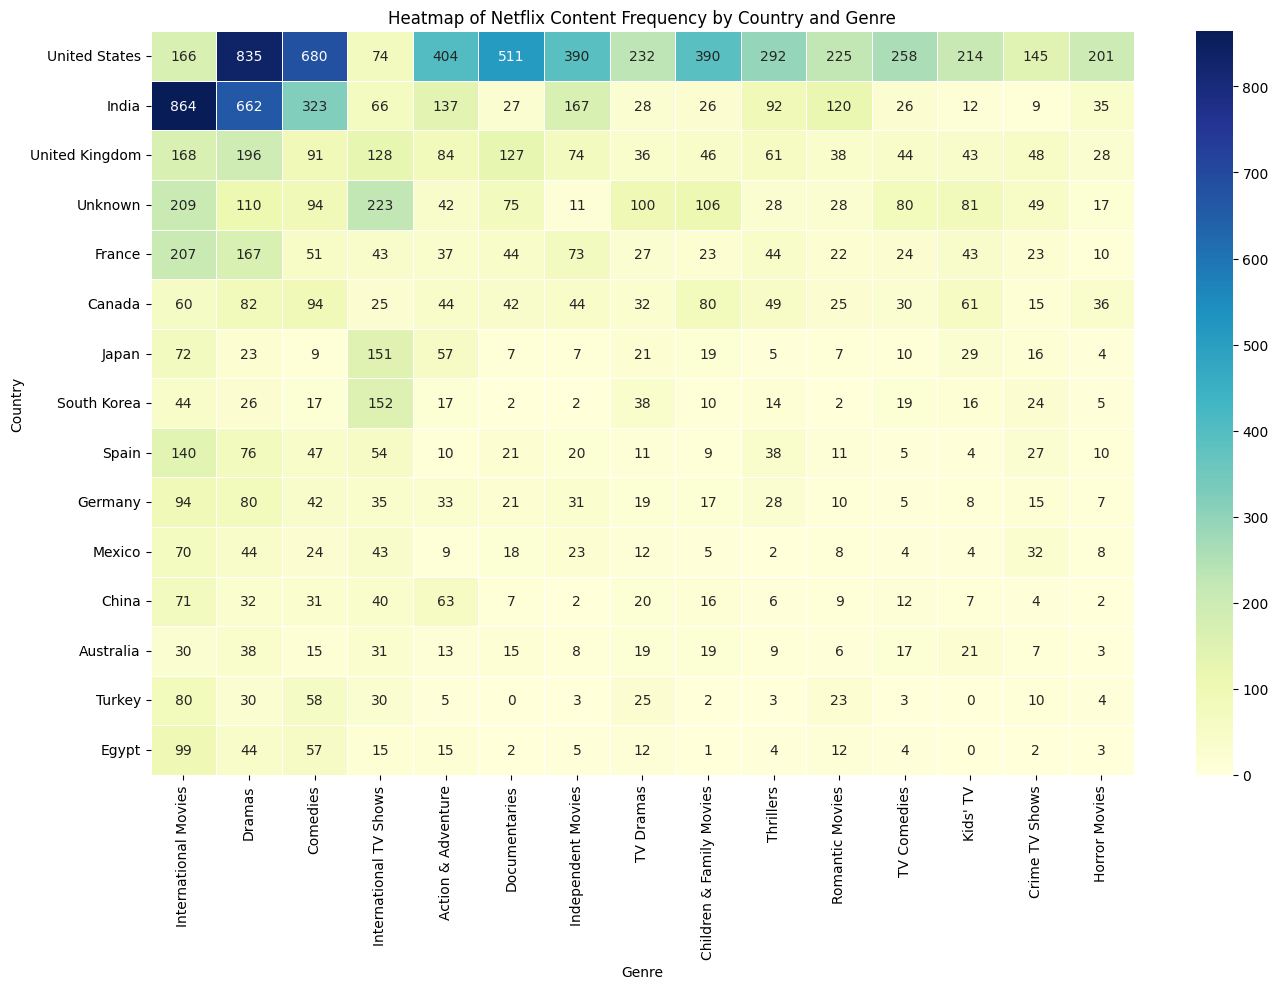

In [ ]:

# Exploding  both lists to get one country-genre per row
df_expanded = dataset.explode('country_list').explode('genre_list')

country_genre_counts = pd.crosstab(df_expanded['country_list'], df_expanded['genre_list'])

# Choosing only top countries for understanding
top_countries = country_genre_counts.sum(axis=1).sort_values(ascending=False).head(15).index
top_genres = country_genre_counts.sum(axis=0).sort_values(ascending=False).head(15).index

# Filter to top countries and genres
filtered_counts = country_genre_counts.loc[top_countries, top_genres]


plt.figure(figsize=(14,10))
sns.heatmap(filtered_counts, cmap='YlGnBu', linewidths=0.5, annot=True, fmt='d')

plt.title('Heatmap of Netflix Content Frequency by Country and Genre')
plt.xlabel('Genre')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

In [57]:

#  most common genre
print("Most common genre:", genre_counts.idxmax())

Most common genre: International Movies


In [60]:

print("\nTop 10 genres:\n", genre_counts.head(10))


Top 10 genres:
 genre_list
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64


In [67]:
year_counts = dataset['release_year'].value_counts().sort_values(ascending=False)

In [68]:
year_counts.head(10)

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
2021     592
2015     560
2014     352
2013     288
2012     237
Name: count, dtype: int64

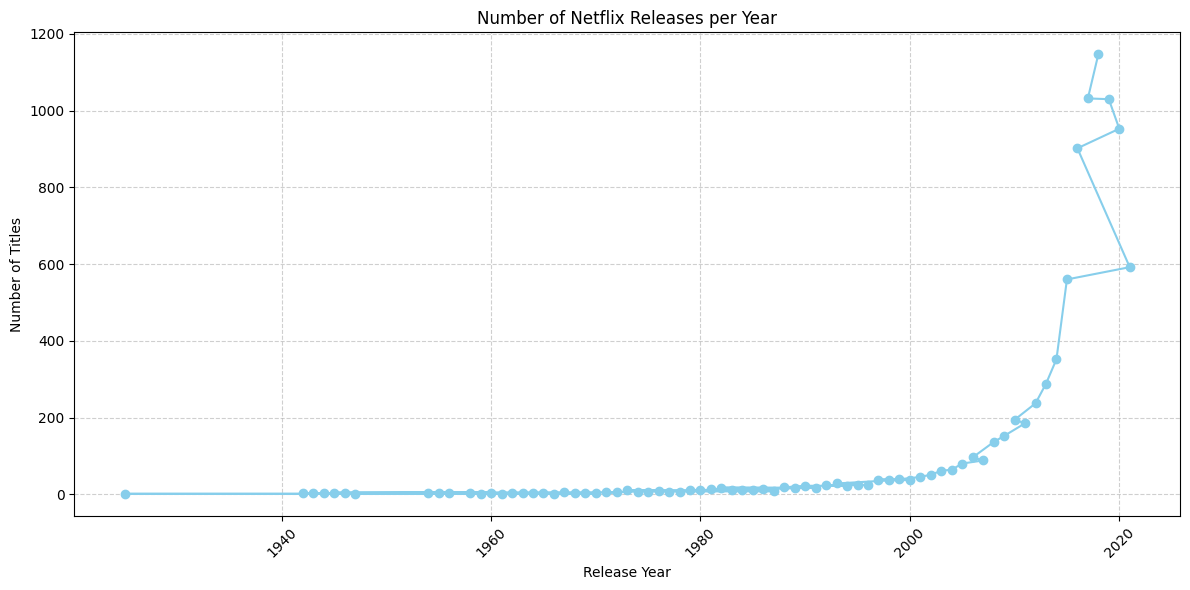

In [102]:
plt.figure(figsize=(12,6))
plt.plot(year_counts.index, year_counts.values, marker='o', color='skyblue')

plt.title('Number of Netflix Releases per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

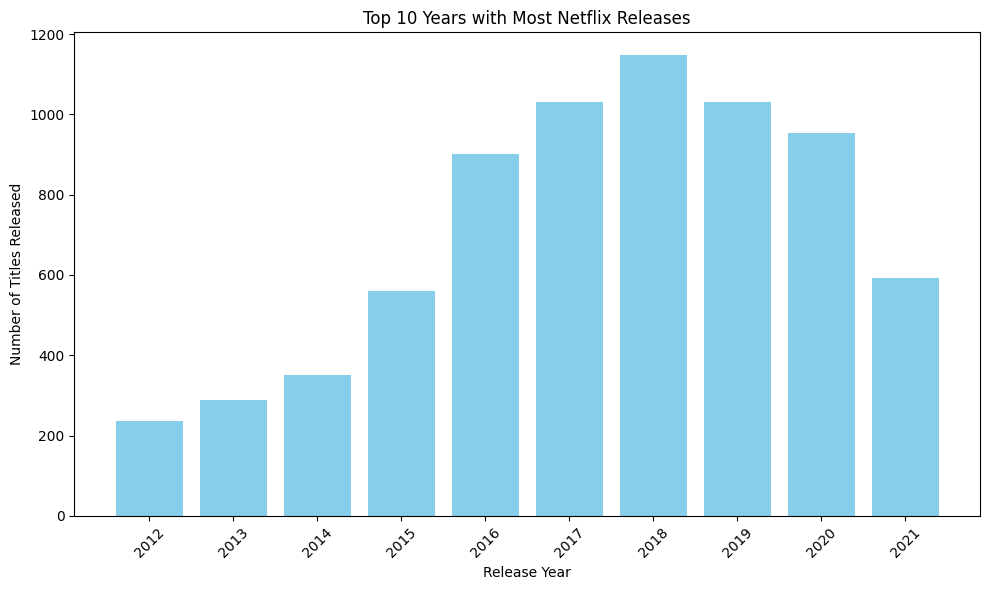

In [69]:
top_years = year_counts.head(10).sort_index()  

plt.figure(figsize=(10,6))
plt.bar(top_years.index.astype(str), top_years.values, color='skyblue')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles Released')
plt.title('Top 10 Years with Most Netflix Releases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [82]:

dataset['rating'] = dataset['rating'].fillna('Not Rated')


Content_Rating = dataset['rating'].value_counts()




In [83]:
Content_Rating

rating
TV-MA        3207
TV-14        2160
TV-PG         863
R             799
PG-13         490
TV-Y7         334
TV-Y          307
PG            287
TV-G          220
NR             80
G              41
TV-Y7-FV        6
Not Rated       4
NC-17           3
UR              3
66 min          1
74 min          1
84 min          1
Name: count, dtype: int64

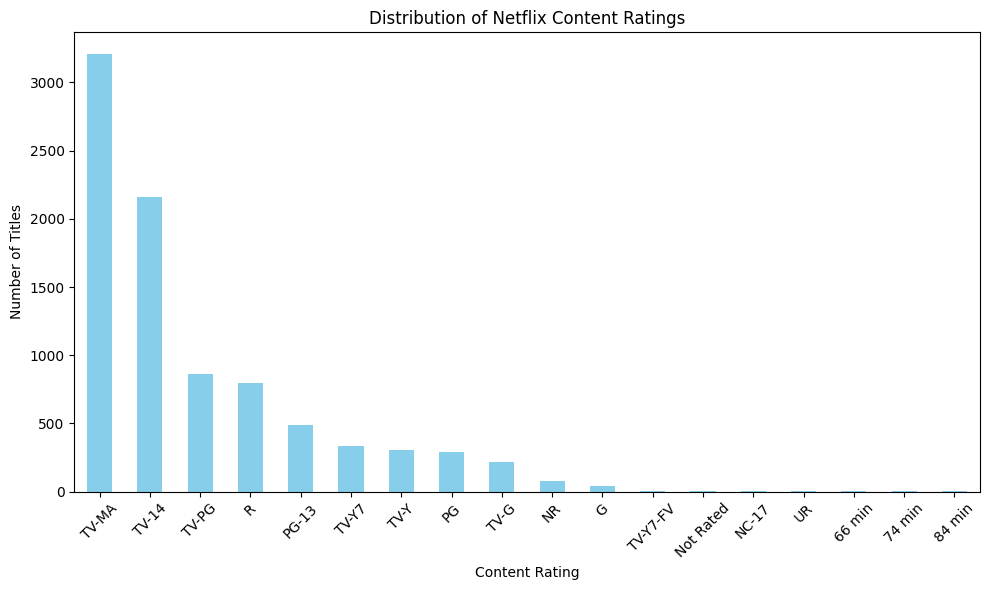

In [84]:
plt.figure(figsize=(10,6))
rating_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Content Rating')
plt.ylabel('Number of Titles')
plt.title('Distribution of Netflix Content Ratings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [99]:
rating_type_counts = dataset.groupby(['rating', 'type']).size().unstack(fill_value=0)
rating_type_counts

type,Movie,TV Show
rating,,
66 min,1,0
74 min,1,0
84 min,1,0
G,41,0
NC-17,3,0
NR,75,5
Not Rated,2,2
PG,287,0
PG-13,490,0


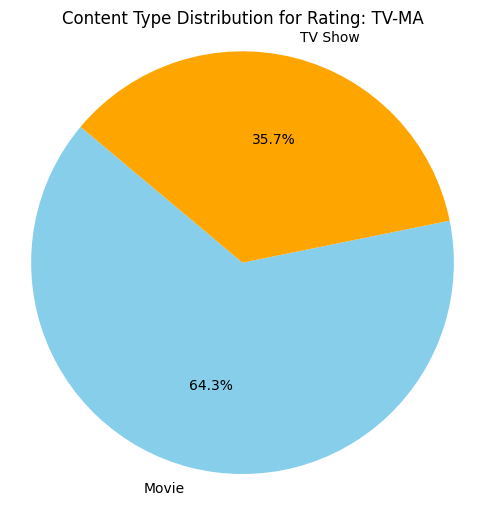

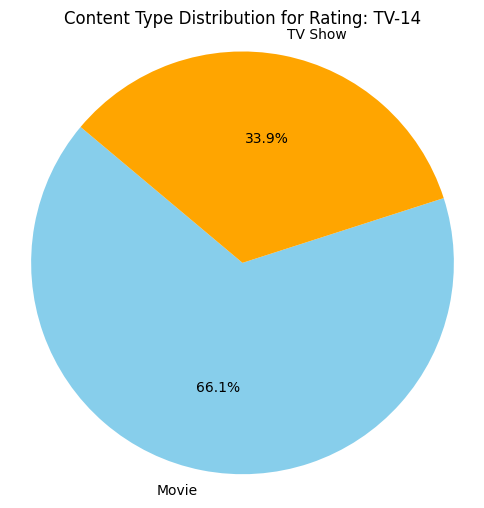

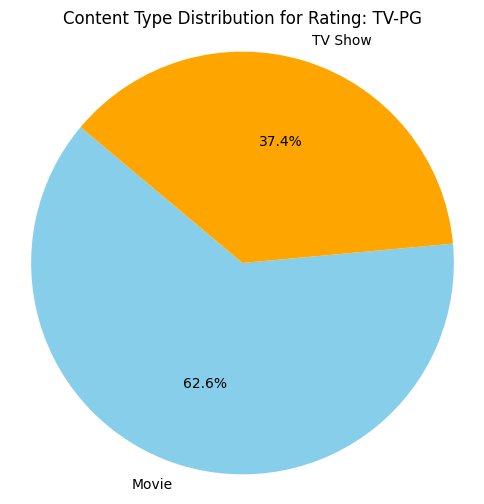

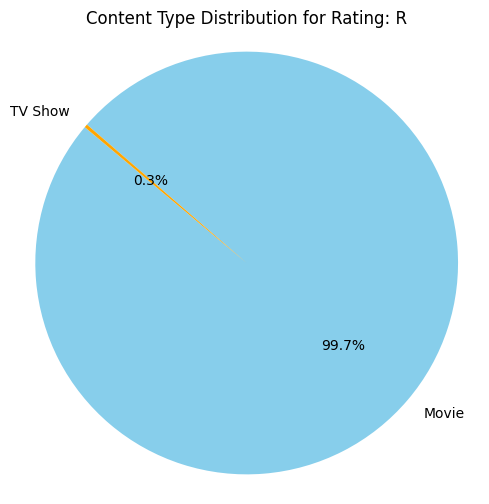

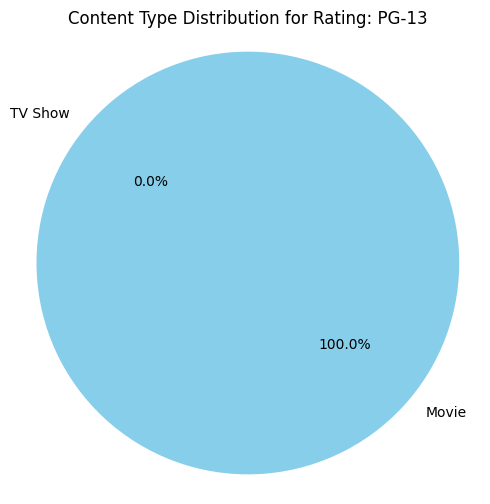

In [101]:
ratings_to_plot = rating_type_counts.sum(axis=1).sort_values(ascending=False).head(5).index.tolist()


for rating in ratings_to_plot:
    counts = rating_type_counts.loc[rating]
    plt.figure(figsize=(6,6))
    plt.pie(
        counts, 
        labels=counts.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=['skyblue', 'orange']
    )
    plt.title(f'Content Type Distribution for Rating: {rating}')
    plt.axis('equal')
    plt.show()


In [85]:
dataset['director_list'] = dataset['director'].str.split(', ')

In [86]:
directors_exploded = dataset.explode('director_list')

In [87]:
director_counts = directors_exploded['director_list'].value_counts()

In [89]:
director_counts.head(10)

director_list
Unknown                2634
Rajiv Chilaka            22
Jan Suter                21
Raúl Campos              19
Suhas Kadav              16
Marcus Raboy             16
Jay Karas                15
Cathy Garcia-Molina      13
Youssef Chahine          12
Martin Scorsese          12
Name: count, dtype: int64

#### 👍